<h4>Load Lib</h4>

In [88]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs,load_digits
from time import time
from collections import Counter
from sklearn import datasets
from scipy.stats import norm
from scipy.integrate import simpson
from sklearn.model_selection import train_test_split
from sklearn.metrics import (f1_score,accuracy_score,
                                confusion_matrix,ConfusionMatrixDisplay,
                                euclidean_distances)
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [89]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

NOISE = 0.1
N_SAMPLES =1000
ALPHA=0.001     #learning rate

In [90]:
params = {
    'legend.fontsize': 'small',
    'figure.figsize': (15,5),
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'savefig.dpi': 75,
    'image.interpolation': 'none',
    'savefig.bbox': 'tight',
    'lines.linewidth': 1,
    'legend.numpoints': 1,
}

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

plt.style.use('seaborn-v0_8-darkgrid')

TEST_SIZE=0.2

<Figure size 1500x500 with 0 Axes>

<h4>Assignment 2 : SVM,KNN</h4>

In [92]:
def fn_plot_decision_boundry(clf,X1,y1,ax=None):
    '''
    Args : 
        clf: classifier
        X1: np.ndarray - Feature matrix
        y1: np.ndarray - lables/target
        ax: matplotlib axis object
       
    '''

    if axis is None:
        ax= plt.gca()
        
    

    dm = 0.05

    x_min, x_max =X1[:,0].min()-0.05,X1[:,0].max()+0.05 #col1
    y_min, y_max =X1[:,1].min()-0.05,X1[:,1].max()+0.05 #col2 

    #Create a meshgrid
    xx, yy= np.meshgrid(np.arange(x_min, x_max, dm),
                   np.arange(y_min, y_max, dm))
    # Stack them
    XX = np.c_[xx.ravel(), yy.ravel()]

    #make predication 
    y_pred = clf.predict(XX)

    # Assign predication to the respect pont
    Z = y_pred.reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha = 0.6, cmap =CMAP)

    ax.scatter(X1[:, 0],X1[:, 1], c = y, s = 20,
              edgecolor = 'k', cmap = CMAP)
    return 

In [93]:
def fn_plot_svc_decision_function(clf):
    # Generate a range of x values based on the current x-axis limits
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    # Generate a range of y values based on the current y-axis limits
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)

    # Create a mesh grid from the y and x values for plotting
    YY, XX = np.meshgrid(y, x)

    # Initialize a zero array to hold the decision function values
    P = np.zeros_like(XX)

    # Iterate over each point in the mesh grid
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            # Compute the decision function for the current point and store it in P
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))[0]
            
    # Create a filled contour plot of the decision function values
    return plt.contour(XX, YY, P, colors='k',
                        levels=[-1, 0, 1],  # Define levels for the contour
                        linestyles=['--', '-', '--'])  # Define the line styles for contours


<h4>Support Vector Machines</h4>

In [95]:
X,y=make_blobs(n_samples=50,centers=2,random_state=RANDOM_STATE,cluster_std=0.6)
X.shape,y.shape
'''
make_blobs: This function is used to create a synthetic dataset for clustering.
n_samples=50: Specifies that 50 samples (data points) should be generated.
centers=2: Indicates that the data should be grouped into 2 distinct clusters.
random_state=RANDOM_STATE: Sets a seed for reproducibility, ensuring that the same random data is generated each time the code is run (replace RANDOM_STATE with an integer).
cluster_std=0.6: Defines the standard deviation of the clusters. A smaller value means tighter clusters.
'''

'\nmake_blobs: This function is used to create a synthetic dataset for clustering.\nn_samples=50: Specifies that 50 samples (data points) should be generated.\ncenters=2: Indicates that the data should be grouped into 2 distinct clusters.\nrandom_state=RANDOM_STATE: Sets a seed for reproducibility, ensuring that the same random data is generated each time the code is run (replace RANDOM_STATE with an integer).\ncluster_std=0.6: Defines the standard deviation of the clusters. A smaller value means tighter clusters.\n'

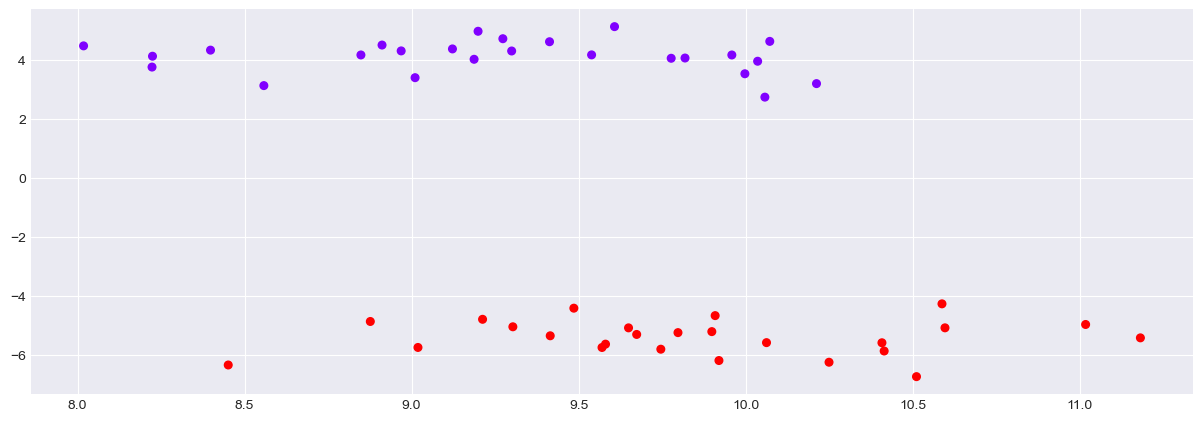

In [96]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=CMAP)

In [97]:
clf=SVC(kernel='linear')


clf.fit(X,y)

SVC(kernel='linear')

<h4>Let's plot</h4>

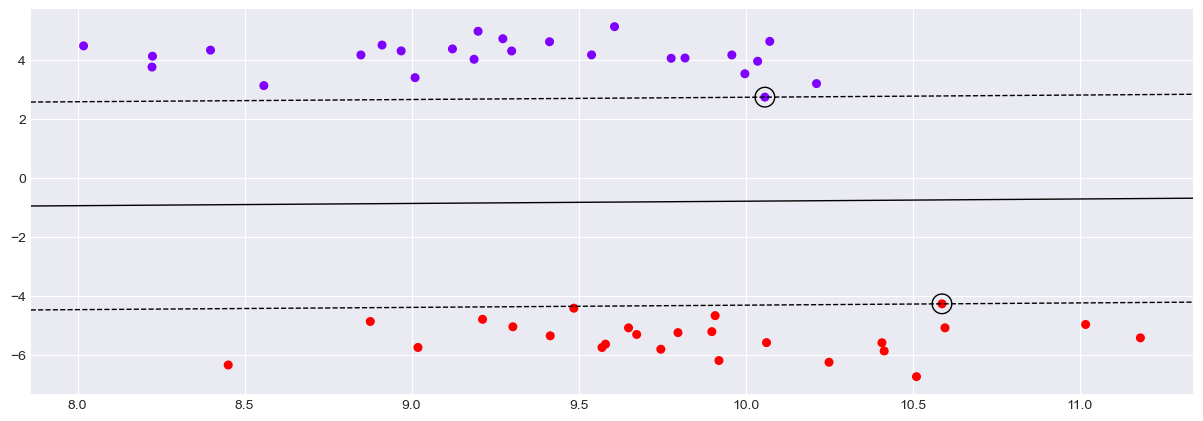

In [110]:
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=CMAP)
# X[:, 0] and X[:, 1]: Selects the first and second features of the data points for the x and y axes.
# c=y: Colors the points according to their class labels (0 or 1).
# s=30: Sets the size of the points to 30 for visibility.
# cmap=CMAP: Uses a colormap (should be defined previously) to distinguish between classes visually.

# Plot the SVC decision function to visualize the decision boundary and margins
fn_plot_svc_decision_function(clf=clf)
# clf: The trained Support Vector Classifier (SVC) whose decision function will be plotted.
# This function typically visualizes the decision boundary, indicating areas where each class is predicted.

# Highlight the support vectors in the plot
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolor='none', edgecolors='k')
# clf.support_vectors_: Accesses the support vectors (critical points) used by the SVC.
# s=200: Sets the size of the support vectors to 200, making them more prominent in the plot.
# facecolor='none': Makes the interior of the support vector markers transparent.
# edgecolors='k': Sets the edge color of the support vectors to black for visibility.

<h4>Using Digits Dataset</h4>

In [113]:
digits=load_digits()

In [117]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [121]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [123]:
X=digits.data
y=digits.target

In [127]:
X.shape,y.shape

((1797, 64), (1797,))

In [129]:
digits.images.shape

(1797, 8, 8)

In [131]:
plot_X=digits.images[:25]
plot_X.shape

(8, 8)

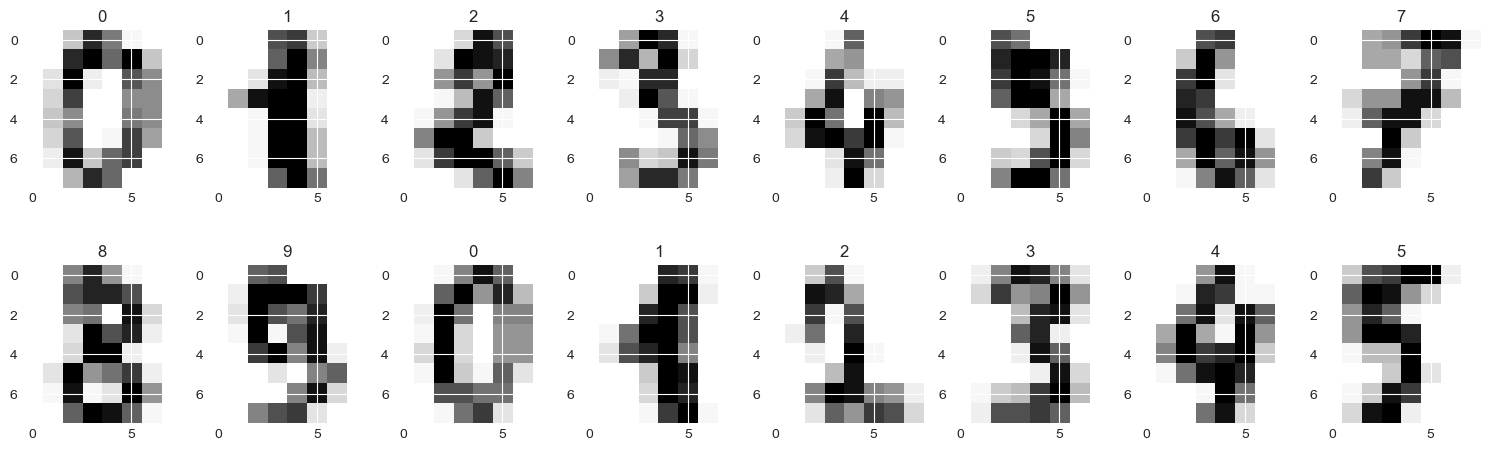

In [141]:
fig,axes=plt.subplots(2,8) # two rows and 8 columns

axes=axes.ravel() #flatten to a shape of (16,)
for count,ax in enumerate(axes): #Iterate and pick ax

    ax.imshow(digits.images[count]) 
    ax.set_title(y[count])
plt.tight_layout()

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=TEST_SIZE,
                                               random_state=RANDOM_STATE,
                                              stratify=y)

In [145]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((1437, 64), (360, 64), (360,), (1437,))

SVC: kernel: linear |F1 Score: 0.9776607203045559
SVC: kernel: rbf    |F1 Score: 0.9860662724950834
SVC: kernel: poly   |F1 Score: 0.9916467661691541


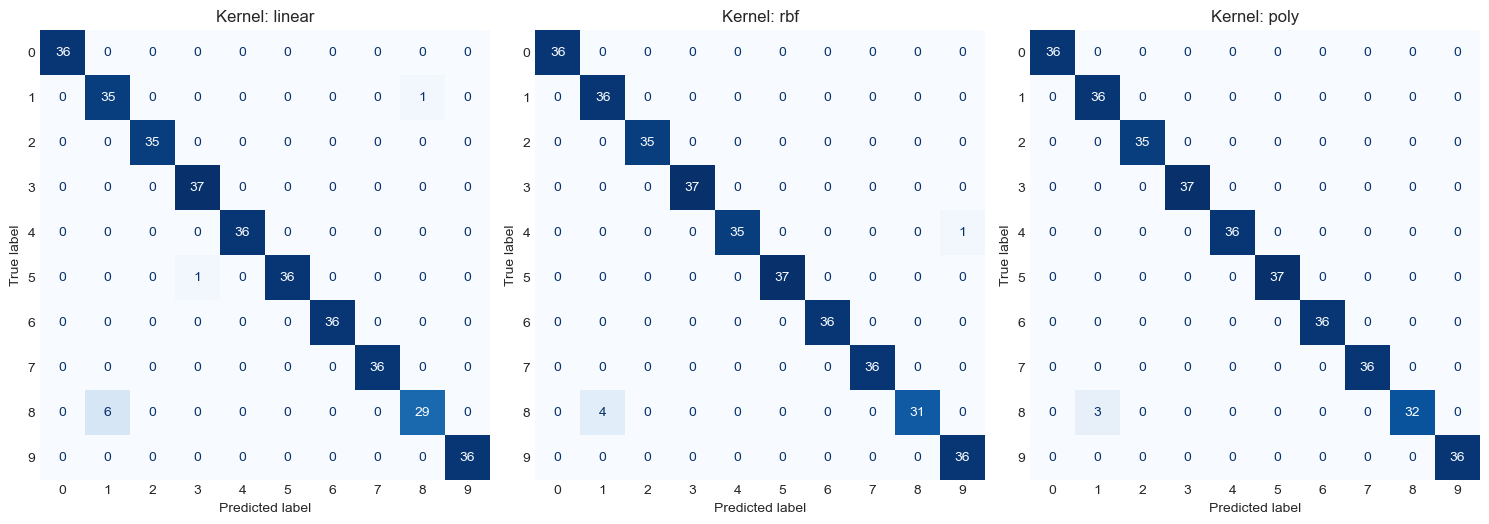

In [151]:
fig,axes=plt.subplots(1,3, figsize = (15,8))

for i , kernel  in enumerate(['linear','rbf','poly']):
    clf=SVC(kernel=kernel).fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f'SVC: kernel: {kernel:<7s}',end='|')
    print(f'F1 Score: {f1_score(y_true=y_test,y_pred=y_pred,average='weighted')}')
    cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=digits.target_names)


    disp.plot(ax=axes[i],cmap=plt.cm.Blues,colorbar=False)
    axes[i].set_title(f'Kernel: {kernel}')
    axes[i].grid()
plt.tight_layout()